In [ ]:
#Google Colab Link: https://colab.research.google.com/drive/18Q7wLrFuXruZ2OulBggtHUlm1dZH8Sw3?usp=sharing

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, UpSampling2D, BatchNormalization, Activation, Dropout
from keras.models import Sequential, load_model
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb
from skimage.transform import resize
from skimage.io import imsave
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

In [ ]:
path = '/content/fool'

train_datagen = ImageDataGenerator(rescale=1. / 255)

train = train_datagen.flow_from_directory(path, target_size=(64, 64), batch_size=5000, class_mode=None)


Found 734 images belonging to 2 classes.


In [ ]:
X =[]
Y =[]
for img in train[0]:
  try:
      lab = rgb2lab(img)
      X.append(lab[:,:,0]) 
      Y.append(lab[:,:,1:] / 128 ) 
  except:
     print('error')
X = np.array(X)
Y = np.array(Y)
X = X.reshape(X.shape+(1,))
print(X.shape)
print(Y.shape)

(734, 64, 64, 1)
(734, 64, 64, 2)


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 1)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(64, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(Dropout(0.5))
model.add(Conv2D(128, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_72 (Conv2D)           (None, 64, 64, 32)        320       
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 8, 8, 128)         147584    
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 4, 4, 256)        

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0003)
model.compile( loss='mse' , metrics=['accuracy'])

Epoch 1/100
7/7 [==============================] - 4s 156ms/step - loss: 0.4813 - accuracy: 0.6867 - val_loss: 0.1033 - val_accuracy: 0.7672
Epoch 2/100
7/7 [==============================] - 0s 39ms/step - loss: 0.0695 - accuracy: 0.7695 - val_loss: 0.0500 - val_accuracy: 0.7747
Epoch 3/100
7/7 [==============================] - 0s 39ms/step - loss: 0.0437 - accuracy: 0.7803 - val_loss: 0.0428 - val_accuracy: 0.7747
Epoch 4/100
7/7 [==============================] - 0s 38ms/step - loss: 0.0386 - accuracy: 0.7704 - val_loss: 0.0421 - val_accuracy: 0.7747
Epoch 5/100
7/7 [==============================] - 0s 39ms/step - loss: 0.0385 - accuracy: 0.7750 - val_loss: 0.0434 - val_accuracy: 0.7747
Epoch 6/100
7/7 [==============================] - 0s 39ms/step - loss: 0.0394 - accuracy: 0.7719 - val_loss: 0.0416 - val_accuracy: 0.7747
Epoch 7/100
7/7 [==============================] - 0s 39ms/step - loss: 0.0390 - accuracy: 0.7804 - val_loss: 0.0423 - val_accuracy: 0.7747
Epoch 8/100
7/7 [==

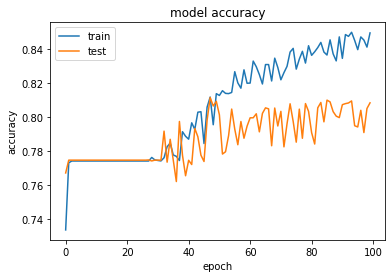

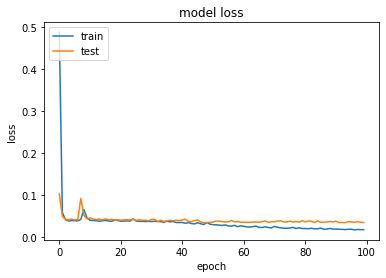

In [ ]:
history = model.fit(X,Y,validation_split=0.1, epochs=100, batch_size=100)

print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/fools1.model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/fools1.model/assets


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def predict(filename):
  img1_color=[]
  img1=img_to_array(load_img(filename))
  img1 = resize(img1 ,(256,256))
  img1_color.append(img1)
  img1_color = np.array(img1_color, dtype=float)
  img1_color = rgb2lab(1.0/255*img1_color)[:,:,:,0]
  img1_color = img1_color.reshape(img1_color.shape+(1,))
  output1 = model.predict(img1_color)
  output1 = output1*128
  result = np.zeros((256, 256, 3))
  result[:,:,0] = img1_color[0][:,:,0]
  result[:,:,1:] = output1[0]
  img= load_img(filename)
  img2 = lab2rgb(result)
  Titles =["Original", "Prediction"]
  images =[img, img2]
  count = 2
  
  for i in range(count):
      plt.subplot(1, 2, i + 1)
      plt.title(Titles[i])
      plt.imshow(images[i])
  
  plt.show()
 

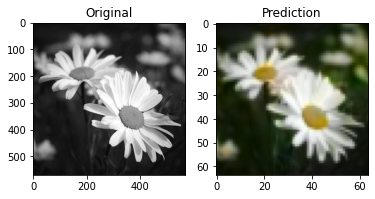

In [ ]:
predict('/content/fool/test/daisy.jpg')

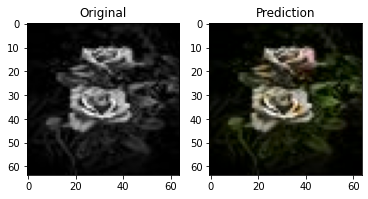

In [ ]:
predict('/content/fool/test/rose1_64x64.jpg')

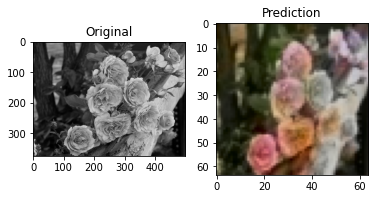

In [ ]:
predict('/content/fool/test/rose2.jpg')

/usr/local/lib/python3.7/dist-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 1205 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


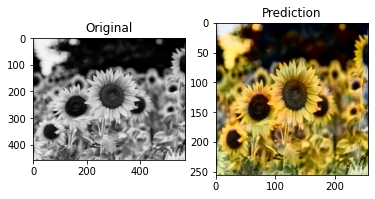

In [ ]:
predict('/content/test/fools/fools.jpg')

/usr/local/lib/python3.7/dist-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 2244 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


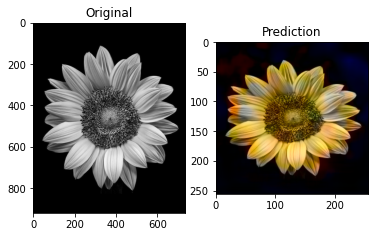

In [ ]:
predict('/content/test/fools/sun1.jpg')

/usr/local/lib/python3.7/dist-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 44 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


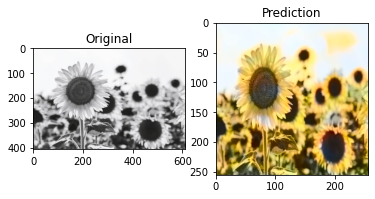

In [ ]:
predict ('/content/test/fools/fool5.jpg')

/usr/local/lib/python3.7/dist-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 1066 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


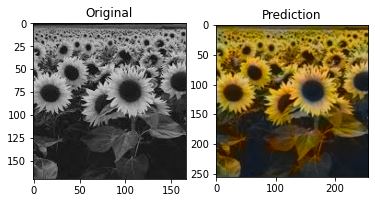

In [ ]:
predict('/content/test/fools/fools7.jfif')